In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=sm.datasets.fair.load_pandas().data

In [3]:
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


As there is no null value in any columns ,so we can move ahead safely

we are creating affair column which will contain 1(having affair) if affairs value is greater than 0 otherwise contain 0(not having affair)

In [6]:
data['affair']= data['affairs'].apply( lambda x: 1 if x>0 else 0)

In [7]:
# data.head()
data.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
5876,5.0,37.0,13.0,3.0,3.0,17.0,4.0,5.0,0.000000,0
3781,2.0,27.0,2.5,0.0,1.0,20.0,4.0,2.0,0.000000,0
2986,4.0,42.0,23.0,2.0,2.0,16.0,4.0,5.0,0.000000,0
2325,5.0,22.0,2.5,2.0,1.0,14.0,3.0,4.0,0.000000,0
1770,4.0,37.0,16.5,3.0,3.0,12.0,5.0,5.0,0.212121,1


In [8]:
data.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [9]:
    data.groupby('affair').count()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4313,4313,4313,4313,4313,4313,4313,4313,4313
1,2053,2053,2053,2053,2053,2053,2053,2053,2053


so we can say out of complete dataset mostly women are not having affair.
women who have affairs rate their marriage lower,which is expected.

In [10]:
data[data.affair==1].groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,34.364865,14.722973,2.283784,2.364865,13.729730,3.324324,3.878378,1.607641,1
2.0,30.760181,11.414027,1.785068,2.230769,13.837104,3.384615,3.873303,2.544251,1
3.0,30.376600,11.079525,1.775137,2.248629,13.917733,3.433272,3.806216,2.489364,1
4.0,30.187845,10.859807,1.691298,2.270718,13.895028,3.479282,3.907459,2.089758,1
5.0,30.553388,11.008214,1.623203,2.260780,14.246407,3.531828,3.944559,1.918888,1


In [11]:
data.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


An increase of age,yrs_married and children leads to decrease in marriage rating but religion,edu,occupation has no effect on affair

In [12]:
# let's plot histogram of education and marriage rating

Text(0, 0.5, 'frequency')

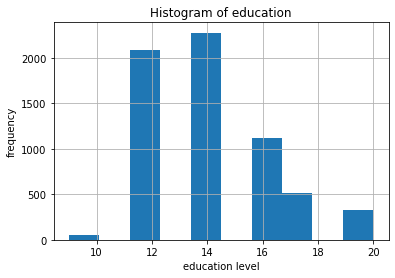

In [13]:
data.educ.hist()
plt.title('Histogram of education')
plt.xlabel("education level")
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

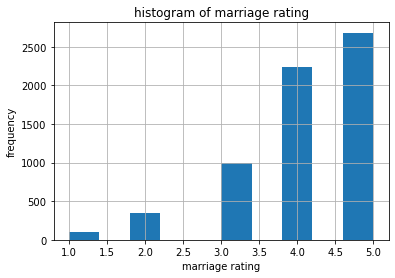

In [14]:
data.rate_marriage.hist()
plt.title('histogram of marriage rating')
plt.xlabel('marriage rating')
plt.ylabel('frequency')

so we can say as rating increase no of records also getting increased that means mostly women have given 5 rating to their marriage

In [15]:
data[data.rate_marriage==5].groupby('affair').count() # so even in rating 5 some women are having affairs

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,2197,2197,2197,2197,2197,2197,2197,2197,2197
1,487,487,487,487,487,487,487,487,487


Text(0, 0.5, 'Frequency')

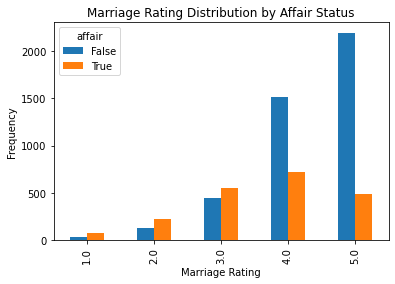

In [16]:
# Let’s take a look at the distribution of marriage ratings for women having affairs, versus those having no affairs.
pd.crosstab(data.rate_marriage, data.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

so now we can say as rating increase so no of not having affair is also increasing but on the opposite side no of having affair is also increasing as rating of marriage increase.In nutshell , women are having affair despite giving rate 5 to marriage.

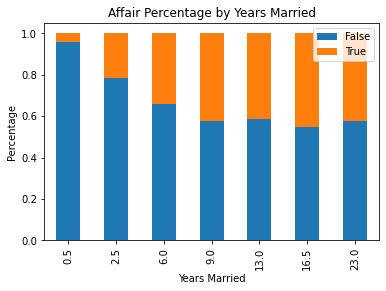

In [17]:
# Let's use a stacked barplot to look at the percentage of women having affairs by number of years of marriage.

affair_yrs_married = pd.crosstab(data.yrs_married, data.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')
plt.legend(loc='upper right')

In [18]:
from patsy import dmatrices
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + \
                religious + educ + C(occupation) + C(occupation_husb)',data, return_type="dataframe")

In [19]:
X

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [20]:
y

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


In [21]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [22]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [23]:
y = np.ravel(y) # to convert multidimensional data into flattened array

In [24]:
y

array([1., 1., 1., ..., 0., 0., 0.])

Let’s run logistic regression on the entire data set, and see how accurate it works!

In [25]:
from sklearn.linear_model import  LogisticRegression
model=LogisticRegression()
model=model.fit(X,y)
model.score(X,y)

C:\Users\poona\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7262016965127238

In [26]:
# 73% accuracy seems good, but what's the null error rate?

y.mean()

0.3224945020420987

Only 32% of the women had affairs, which means that we could obtain 68% accuracy by always predicting "no". 
So we're doing better than the null error rate, but not by much.

In [27]:
# Let's examine the coefficients to see what we learn-

pd.DataFrame(list(zip(X.columns,np.transpose(model.coef_))))

,0,1
0,Intercept,[1.440250379569369]
1,occ_2,[0.12098716148045027]
2,occ_3,[0.3740713908948479]
3,occ_4,[0.11514739612295936]
4,occ_5,[0.7071444049675398]
5,occ_6,[0.3371833762506303]
6,occ_husb_2,[0.27984899216048903]
7,occ_husb_3,[0.4017768597231282]
8,occ_husb_4,[0.24489150470473642]
9,occ_husb_5,[0.27926533058191266]


From the above output we can say-Increases in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair. 

For both the wife's occupation and the husband's occupation, the lowest likelihood of having an affair corresponds to the baseline occupation (student), since all of the dummy coefficients are positive.

now dividing the dataset into training and testing 

In [28]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state = 355)

In [29]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\Users\poona\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred = log_reg.predict(x_test)

In [31]:
probs=log_reg.predict_proba(x_test)
print(probs)

[[0.46320641 0.53679359]
 [0.69407228 0.30592772]
 [0.88713251 0.11286749]
 ...
 [0.39261268 0.60738732]
 [0.18392259 0.81607741]
 [0.54140973 0.45859027]]


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7154522613065326

In [33]:
roc_accur=roc_auc_score(y_test,probs[:,1])
print(roc_accur)

0.7357801014033762


In [34]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[965, 119],
       [334, 174]], dtype=int64)

In [35]:
class_rept=classification_report(y_test,y_pred)
print(class_rept)

              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81      1084
         1.0       0.59      0.34      0.43       508

    accuracy                           0.72      1592
   macro avg       0.67      0.62      0.62      1592
weighted avg       0.70      0.72      0.69      1592



In [36]:
# evaluate the model using 10-fold cross-validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

C:\Users\poona\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\poona\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

(array([0.72370487, 0.69544741, 0.73469388, 0.70643642, 0.71585557,
        0.7299843 , 0.72955975, 0.70754717, 0.75      , 0.75314465]),
 0.7246374021306636)

It’s still performing at 72% accuracy.

In [37]:
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

In [38]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=log_reg,param_grid=grid_values,cv=10,n_jobs =-1,verbose = 3)

In [39]:
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   34.7s finished
C:\Users\poona\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [40]:
grid_search.best_params_

{'C': 10, 'penalty': 'l2'}

In [41]:
log_reg2=LogisticRegression(C=10,penalty='l2')

In [42]:
log_reg2.fit(x_train,y_train)

C:\Users\poona\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

In [43]:
log_reg2.score(x_train,y_train)

0.7289484708839548

In [44]:
log_reg2.score(x_test,y_test)

0.7185929648241206

so now we can say even after applying hyperpararmeter tuning we are getting almost same result